In [1]:
from tensorflow.keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras import Sequential, Model
from data import Data
from graphs import Graph
import numpy as np

In [2]:
data = Data("data")
data.config_iter(100, 3)
data.__iter__()
print(len(data))
x, x2, y = next(data)
x.shape, x2.shape, y.shape

5


((100, 16, 16), (100, 16, 16), (100, 16, 16))

In [35]:
inp_graph = Input((16, 16))
inp_point = Input((16, 16))

x = GRU(128, "relu", dropout=0.1, return_sequences=True)(inp_graph)
x = GRU(64, "relu", dropout=0.1, return_sequences=True)(x)
x = GRU(32, "relu", dropout=0.1, return_sequences=True)(x)
x = GRU(16, "relu", dropout=0.1, return_sequences=True)(x)
x_re = Reshape((16, 16, 1))(x)

x2 = Flatten()(inp_point)
x2 = Dense(256,"relu")(x2)
x2_re = Reshape((16, 16, 1))(x2)

x = concatenate([
    x_re,
    x2_re
])

x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)  # 16 16 8
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)  # 16 16 8
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)  # 16 16 8
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)  # 16 16 16
x = Conv2D(32, (3, 3), activation="relu", strides=(2, 2), padding="same")(x)  # 8,8,16
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)  # 8 8 32
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)  # 8 8 64
x = Conv2D(128, (3, 3), activation="relu", strides=(2, 2), padding="same")(x)  # 4,4,64
x = Conv2D(256, (3, 3), activation="relu", padding="same")(x)  # 8 8 64
x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(512, "relu")(x)
x = Dropout(0.1)(x)
x = Dense(256, "softmax")(x)
output = Reshape((16, 16))(x)
model = Model([inp_graph, inp_point], output)
model.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 16, 16)]     0           []                               
                                                                                                  
 gru_56 (GRU)                   (None, 16, 128)      56064       ['input_23[0][0]']               
                                                                                                  
 gru_57 (GRU)                   (None, 16, 64)       37248       ['gru_56[0][0]']                 
                                                                                                  
 input_24 (InputLayer)          [(None, 16, 16)]     0           []                               
                                                                                            

In [36]:
model.compile(optimizer="adam",  # adam
              loss='categorical_crossentropy',  # mse # categorical_crossentropy binary_crossentropy
              metrics=['accuracy', "mse"])


In [33]:
x_val, x2_val, y_val = data.drop_data_in_file(4)
x_val, x2_val, y_val = x_val[200:500], x2_val[200:500], y_val[200:500]
print(x_val.shape, x2_val.shape, y_val.shape)

(300, 16, 16) (300, 16, 16) (300, 16, 16)


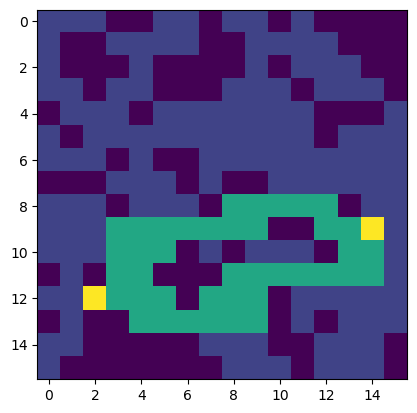

In [40]:
n = 250
plt.imshow(x_val[n] + x2_val[n] * 2 + y_val[n] * 2)

In [7]:
data.config_iter(5000, 4)
m = 0
for i in data:
    m += len(i[0])
m


40209

In [37]:
ep = 100
acc = [[], []]
losss = [[], []]
mse = [[], []]
for i in range(ep):
    for x1, x2, y in data:
        h = model.fit([x1, x2], y, 64, validation_data=((x_val, x2_val), y_val)).history

        acc[0].append(h["accuracy"])
        acc[1].append(h["val_accuracy"])

        losss[0].append(h["loss"])
        losss[1].append(h["val_loss"])

        mse[0].append(h["mse"])
        mse[1].append(h["val_mse"])

    print(f"\n{i}ep\n")



17/17 [==============================] - 1s 83ms/step - loss: 2.8167 - accuracy: 0.0930 - mse: 0.0755 - val_loss: 3.0011 - val_accuracy: 0.0585 - val_mse: 0.0765

0ep

  9/141 [>.............................] - ETA: 10s - loss: 2.8573 - accuracy: 0.0648 - mse: 0.0730

KeyboardInterrupt: 

10/10 [==============================] - 0s 12ms/step
(300, 16, 16)


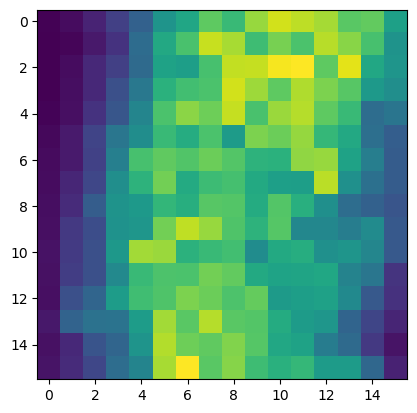

In [41]:
n = n
r = model.predict((x_val,x2_val))
print(r.shape)
plt.imshow(r[n])

In [ ]:
plt.imshow(y1[0])
plt.show()
res = model(x)
res = np.array(res)
res.shape = (16, 16)
plt.imshow(res)

In [ ]:
res